1.自选适当方法进行图像去噪（例如邻域平均，中值滤波等）；

(-0.5, 299.5, 245.5, -0.5)

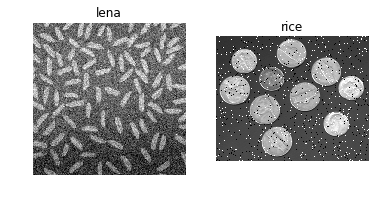

In [5]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
gaussinan = io.imread(r'.\pic\gaussiannoiseimage.bmp',0)
saltpepoer = io.imread(r'.\pic\saltpepoernoiseimage.bmp',0)
plt.subplot(121);plt.title('lena');plt.imshow(gaussinan, cmap ='gray')
plt.axis("off")
plt.subplot(122);plt.title('rice');plt.imshow(saltpepoer, cmap ='gray')
plt.axis("off")

定义中值滤波函数和均值滤波函数

In [9]:
from skimage.morphology import disk
import skimage.filters.rank as sfr
def mean_img(img,n):
    imgt = sfr.mean(img, disk(n))
    return imgt
def median_img(img,n):
    imgt = sfr.median(img, disk(n))
    return imgt

使用两种方法对椒盐噪音图像进行处理

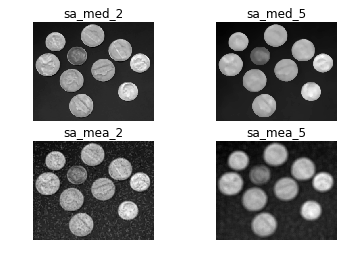

In [10]:
plt.subplot(221);plt.title('sa_med_2');plt.imshow(median_img(saltpepoer,2), cmap ='gray')
plt.axis("off")
plt.subplot(222);plt.title('sa_med_5');plt.imshow(median_img(saltpepoer,5), cmap ='gray')
plt.axis("off")
plt.subplot(223);plt.title('sa_mea_2');plt.imshow(mean_img(saltpepoer,2), cmap ='gray')
plt.axis("off")
plt.subplot(224);plt.title('sa_mea_5');plt.imshow(mean_img(saltpepoer,5), cmap ='gray')
plt.axis("off")
plt.show()

通过上图我们可得出结论，即中值滤波对于去除椒盐噪声效果最好，而对高斯噪声不是很理想。中值滤波对于去除椒盐噪声效果明显，是因为椒盐噪声只在画面上的部分点随机出现，而中值滤波根据数据排序，将未被污染的点代替噪声点的值的概率较大，所以抑制效果好。对点、线和尖顶较多的图像不宜采用中值滤波，因为一些细节点可能被当成噪声点。

使用两种方法对高斯噪声图像进行处理

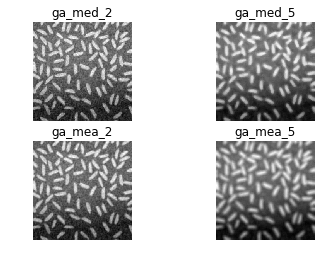

In [13]:
plt.subplot(221);plt.title('ga_med_2');plt.imshow(median_img(gaussinan,2), cmap ='gray')
plt.axis("off")
plt.subplot(222);plt.title('ga_med_5');plt.imshow(median_img(gaussinan,5), cmap ='gray')
plt.axis("off")
plt.subplot(223);plt.title('ga_mea_2');plt.imshow(mean_img(gaussinan,2), cmap ='gray')
plt.axis("off")
plt.subplot(224);plt.title('ga_mea_5');plt.imshow(mean_img(gaussinan,5), cmap ='gray')
plt.axis("off")
plt.show()

根据对上图的观察可以明显发现，使用均值滤波对高斯噪声进行去噪效果比较好，虽然对椒盐也有效果，但是不如对高斯噪声的处理效果好。另外处理时选用的邻域半径越大效果越好，当然其代价也会更大，在去噪的同时图像失去的信息也会更多的。